# Demo Time Series Nuclear Power France

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
seattle_temp=pd.read_csv('seattleWeather_1948-2017.csv', sep=',').drop(['PRCP','TMIN','RAIN'],axis=1)
seattle_temp['DATE']=pd.to_datetime(seattle_temp['DATE'], )
seattle_temp=seattle_temp.set_index('DATE')[:-1]
seattle_temp

,TMAX
DATE,
1948-01-01,51
1948-01-02,45
1948-01-03,45
1948-01-04,45
1948-01-05,45
...,...
2017-12-09,44
2017-12-10,49
2017-12-11,49


In [5]:
testset=trainset.iloc[-49:]
testset

,Valeur (GW)
Date,
2024-02-01,48.94804
2024-02-02,49.06049
2024-02-03,45.53645
2024-02-04,45.02441
2024-02-05,46.83975
2024-02-06,48.62854
2024-02-07,48.45267
2024-02-08,48.18729
2024-02-09,47.32187


In [88]:
seattle_temp_20=seattle_temp.iloc[-3635:-347]
seattle_temp_20

,TMAX
DATE,
2008-01-01,47
2008-01-02,46
2008-01-03,49
2008-01-04,53
2008-01-05,46
...,...
2016-12-27,44
2016-12-28,47
2016-12-29,48


In [89]:
seattle_temp_weekly=seattle_temp_20.resample('W').mean()
seattle_temp_monthly=seattle_temp_20.resample('M').mean()

<Axes: title={'center': 'monthly'}, xlabel='DATE'>

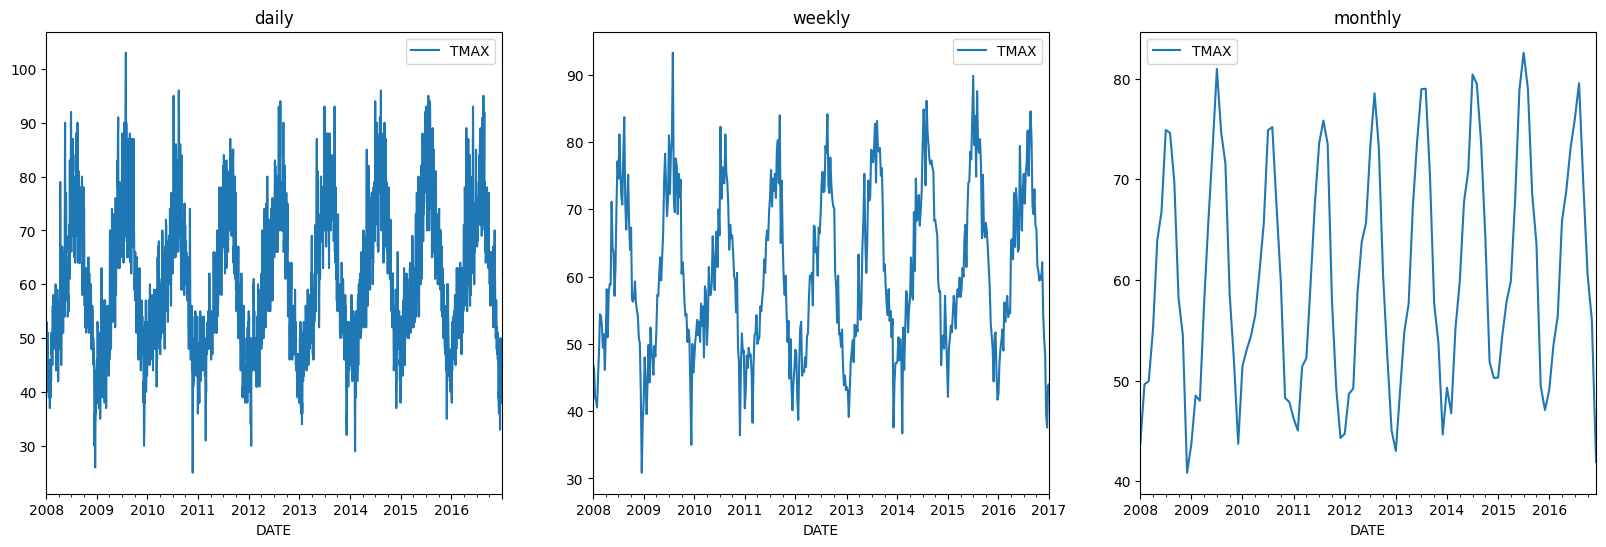

In [90]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
seattle_temp_20.plot(ax=ax[0],title='daily')
seattle_temp_weekly.plot(ax=ax[1],title='weekly')
seattle_temp_monthly.plot(ax=ax[2],title='monthly')

In [91]:
seattle_temp_monthly['nm_m']=seattle_temp_monthly.index.map(lambda x: str(x).split('-')[1])
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
seattle_temp_monthly['month']=seattle_temp_monthly.nm_m.map(lambda x: months[int(x)-1])

In [92]:
seattle_temp_monthly

,TMAX,nm_m,month
DATE,,,
2008-01-31,43.612903,01,jan
2008-02-29,49.620690,02,feb
2008-03-31,49.935484,03,mar
2008-04-30,55.100000,04,apr
2008-05-31,63.935484,05,may
...,...,...,...
2016-08-31,79.548387,08,aug
2016-09-30,69.566667,09,sep
2016-10-31,60.548387,10,oct


In [93]:
BBT=pd.DataFrame(index=range(9),columns=range(12))
for i in range(9):
    BBT.iloc[i,:]=seattle_temp_monthly.iloc[12*i:12*(1+i),:].sort_values('TMAX')['month']
BBT

,0,1,2,3,4,5,6,7,8,9,10,11
0,dec,jan,feb,mar,nov,apr,oct,may,jun,sep,aug,jul
1,jan,dec,mar,feb,nov,apr,oct,may,sep,jun,aug,jul
2,dec,nov,jan,feb,mar,apr,oct,may,jun,sep,jul,aug
3,dec,feb,jan,nov,mar,apr,oct,may,jun,sep,jul,aug
4,jan,dec,feb,mar,nov,apr,oct,may,jun,sep,jul,aug
5,jan,dec,feb,nov,mar,oct,apr,may,sep,jun,jul,aug
6,feb,jan,dec,nov,mar,apr,oct,may,jun,sep,aug,jul
7,dec,nov,jan,feb,mar,apr,oct,may,sep,jun,aug,jul
8,dec,jan,feb,nov,mar,oct,apr,may,sep,jun,jul,aug


In [94]:
dfm=pd.DataFrame(index=range(9),columns=months)
for i in range(9):
    dfm.iloc[i,:]=seattle_temp_monthly['TMAX'].iloc[12*i:12*(1+i)]
dfm

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,43.612903,49.62069,49.935484,55.1,63.935484,66.766667,74.903226,74.612903,69.766667,58.16129,54.5,40.83871
1,43.677419,48.5,48.0,57.7,65.870968,73.133333,80.967742,74.677419,71.566667,58.548387,51.966667,43.709677
2,51.451613,53.071429,54.451613,56.5,60.83871,65.633333,74.870968,75.193548,67.333333,59.806452,48.266667,47.870968
3,46.225806,45.035714,51.387097,52.233333,59.741935,67.6,73.580645,75.83871,73.5,58.0,49.3,44.290323
4,44.709677,48.689655,49.193548,58.766667,63.806452,65.666667,73.225806,78.548387,73.2,60.483871,52.4,45.032258
5,43.0,49.035714,54.870968,57.633333,67.322581,73.833333,78.967742,79.0,70.433333,57.612903,53.7,44.645161
6,49.290323,46.75,55.225806,59.833333,67.774194,70.866667,80.419355,79.483871,73.7,64.322581,51.866667,50.258065
7,50.290323,54.535714,57.870968,59.9,68.032258,78.9,82.580645,78.967742,68.533333,63.580645,49.433333,47.064516
8,49.064516,53.551724,56.419355,65.9,68.83871,73.1,75.967742,79.548387,69.566667,60.548387,56.033333,41.903226


In [95]:
season_correctedm=dfm.mean()-dfm.mean(axis=0).sum()/len(dfm.mean())
season_correctedm

jan      -13.703
feb   -10.650993
mar    -7.477193
apr    -2.342546
may     4.612412
jun    10.094491
jul    16.759366
aug    16.802377
sep    10.327825
oct     -0.39834
nov    -8.575879
dec   -15.448519
dtype: object

In [96]:
seattle_temp_20['no_seasonm']=seattle_temp_20['TMAX']
for mon in season_correctedm.index:
    for year in range(9):
        seattle_temp_20['no_seasonm'].loc[f'{2008+year}-{mon}']=seattle_temp_20['no_seasonm'].loc[f'{2008+year}-{mon}']-season_correctedm[mon]
seattle_temp_20

C:\Users\maxvi\AppData\Local\Temp\ipykernel_22468\2850161497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_temp_20['no_seasonm']=seattle_temp_20['TMAX']
C:\Users\maxvi\AppData\Local\Temp\ipykernel_22468\2850161497.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[60.70299976 59.70299976 62.70299976 66.70299976 59.70299976 54.70299976
 53.70299976 56.70299976 55.70299976 63.70299976 60.70299976 63.70299976
 64.70299976 60.70299976 54.70299976 53.70299976 54.70299976 55.70299976
 55.70299976 54.70299976 52.70299976 54.70299976 57.70299976 59.70299976
 55.70299976 52.70299976 53.70299976 50.70299976 53.70299976 56.70299976
 55.70299976]' has dtype incompatible w

,TMAX,no_seasonm
DATE,,
2008-01-01,47,60.703000
2008-01-02,46,59.703000
2008-01-03,49,62.703000
2008-01-04,53,66.703000
2008-01-05,46,59.703000
...,...,...
2016-12-27,44,59.448519
2016-12-28,47,62.448519
2016-12-29,48,63.448519


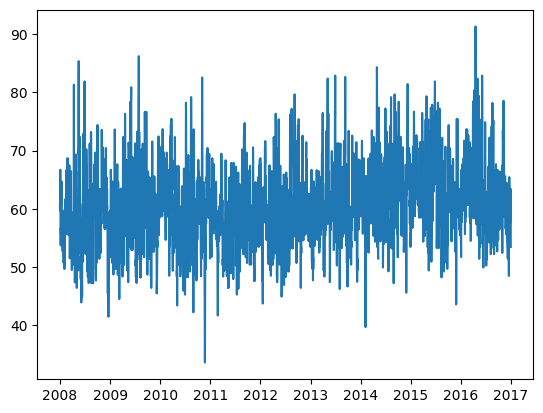

In [97]:
plt.plot(seattle_temp_20.no_seasonm)

section suivante : par trimestre

In [66]:
seattle_temp_monthly['nm_q']=seattle_temp_monthly.nm_m.map(lambda x: (int(x)-1)//3+1)
seattle_temp_monthly

,TMAX,nm_m,month,nm_q
DATE,,,,
2008-01-31,43.612903,01,jan,1
2008-02-29,49.620690,02,feb,1
2008-03-31,49.935484,03,mar,1
2008-04-30,55.100000,04,apr,2
2008-05-31,63.935484,05,may,2
...,...,...,...,...
2016-08-31,79.548387,08,aug,3
2016-09-30,69.566667,09,sep,3
2016-10-31,60.548387,10,oct,4


In [67]:
trainset_quarterly = seattle_temp_20.resample('Q').mean()
trainset_quarterly['nm_q']=seattle_temp_monthly.nm_q
trainset_quarterly

,TMAX,no_seasonm,nm_q
DATE,,,
2008-03-31,47.681319,58.290822,1
2008-06-30,61.956044,57.829196,2
2008-09-30,73.130435,58.453818,3
2008-12-31,51.130435,59.266620,4
2009-03-31,46.666667,57.275709,1
2009-06-30,65.571429,61.444581,2
2009-09-30,75.782609,61.105992,3
2009-12-31,51.402174,59.538359,4
2010-03-31,52.988889,63.597931,1


In [70]:
BBTq=pd.DataFrame(index=range(9),columns=range(5)[1:])
for i in range(9):
    BBTq.iloc[i,:]=trainset_quarterly.iloc[4*i:4*(1+i),:].sort_values('TMAX')['nm_q']
BBTq

,1,2,3,4
0,1,4,2,3
1,1,4,2,3
2,4,1,2,3
3,1,4,2,3
4,1,4,2,3
5,1,4,2,3
6,1,4,2,3
7,4,1,2,3
8,4,1,2,3


In [72]:
df=pd.DataFrame(index=range(9),columns=range(5)[1:])
for i in range(9):
    df.iloc[i,:]=trainset_quarterly['TMAX'].iloc[4*i:4*(1+i)]
df

,1,2,3,4
0,47.681319,61.956044,73.130435,51.130435
1,46.666667,65.571429,75.782609,51.402174
2,52.988889,60.989011,72.521739,52.021739
3,47.633333,59.857143,74.315217,50.543478
4,47.505495,62.758242,75.01087,52.641304
5,48.966667,66.274725,76.195652,51.967391
6,50.544444,66.175824,77.913043,55.521739
7,54.222222,68.934066,76.782609,53.402174
8,53.0,69.274725,75.086957,52.793478


In [73]:
season_corrected=df.mean()-df.mean(axis=0).sum()/len(df.mean())
season_corrected

1   -10.620199
2     4.111154
3    14.660923
4    -8.151879
dtype: object

In [74]:
season_corrected.sum()

1.4210854715202004e-14

In [75]:
seattle_temp_20['no_season']=trainset['TMAX']
for quarter in season_corrected.index:
    for year in range(9):
        seattle_temp_20['no_season'].loc[f'{2008+year}-{quarter}']=seattle_temp_20['no_season'].loc[f'{2008+year}-{quarter}']-season_corrected[quarter]
seattle_temp_20

C:\Users\maxvi\AppData\Local\Temp\ipykernel_22468\964660914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_temp_20['no_season']=trainset['TMAX']
C:\Users\maxvi\AppData\Local\Temp\ipykernel_22468\964660914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_temp_20['no_season'].loc[f'{2008+year}-{quarter}']=seattle_temp_20['no_season'].loc[f'{2008+year}-{quarter}']-season_corrected[quarter]
C:\Users\maxvi\AppData\Local\Temp\ipykernel_22468\964660914.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a fu

,TMAX,no_seasonm,no_season
DATE,,,
2008-01-01,47,60.703000,57.620199
2008-01-02,46,59.703000,56.620199
2008-01-03,49,62.703000,59.620199
2008-01-04,53,66.703000,63.620199
2008-01-05,46,59.703000,56.620199
...,...,...,...
2016-12-27,44,59.448519,44.000000
2016-12-28,47,62.448519,47.000000
2016-12-29,48,63.448519,48.000000


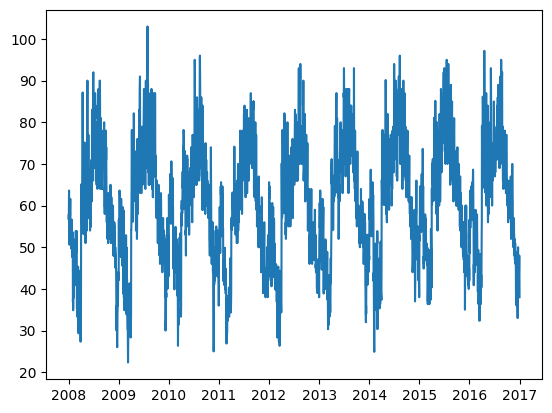

In [76]:
plt.plot(seattle_temp_20.no_season)

In [101]:
from sklearn.linear_model import LinearRegression
modeleReg=LinearRegression()
modeleReg.fit(np.array(range(len(seattle_temp_20))).reshape(-1,1),seattle_temp_20.no_seasonm)

LinearRegression()

In [102]:
coef=modeleReg.coef_
intercept=modeleReg.intercept_
coef, intercept

(array([0.00158336]), 57.915055425775726)

In [103]:
trend=coef*np.array(range(len(seattle_temp_20))).reshape(-1,1)+intercept
trend=np.hstack(trend)
trend

array([57.91505543, 57.91663879, 57.91822215, ..., 63.11639536,
       63.11797872, 63.11956208])

In [104]:
seattle_temp_20['residual']=seattle_temp_20.no_seasonm-trend
seattle_temp_20

C:\Users\maxvi\AppData\Local\Temp\ipykernel_22468\22702412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_temp_20['residual']=seattle_temp_20.no_seasonm-trend


,TMAX,no_seasonm,residual
DATE,,,
2008-01-01,47,60.703000,2.787944
2008-01-02,46,59.703000,1.786361
2008-01-03,49,62.703000,4.784778
2008-01-04,53,66.703000,8.783194
2008-01-05,46,59.703000,1.781611
...,...,...,...
2016-12-27,44,59.448519,-3.664709
2016-12-28,47,62.448519,-0.666293
2016-12-29,48,63.448519,0.332124


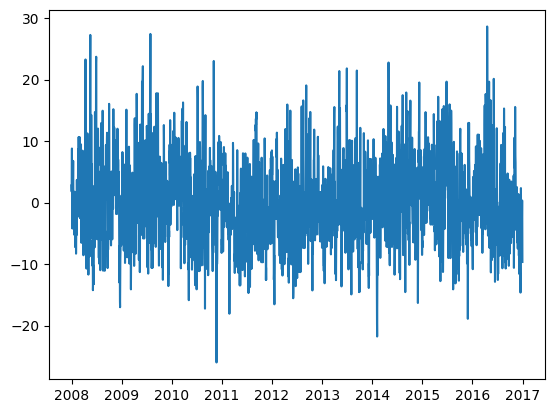

In [105]:
plt.plot(seattle_temp_20.residual)

In [106]:
seattle_temp_20.residual.describe()

count    3.288000e+03
mean    -3.181019e-15
std      6.677831e+00
min     -2.601279e+01
25%     -4.562100e+00
50%     -5.973842e-01
75%      3.978597e+00
max      2.862991e+01
Name: residual, dtype: float64

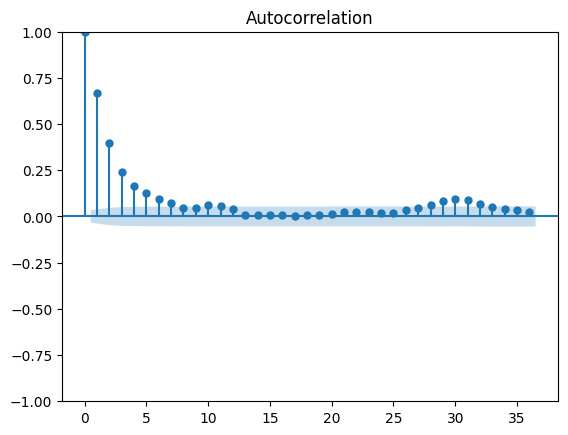

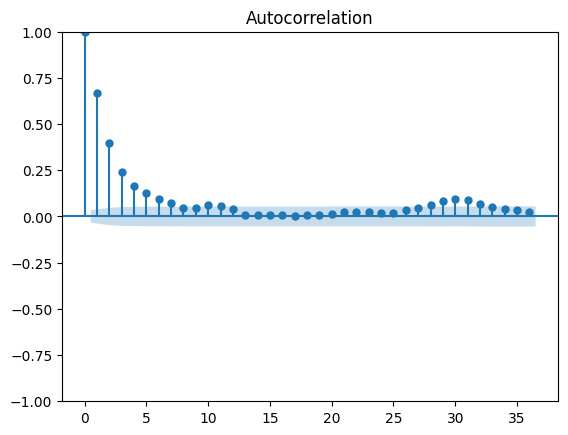

In [109]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(seattle_temp_20.residual)

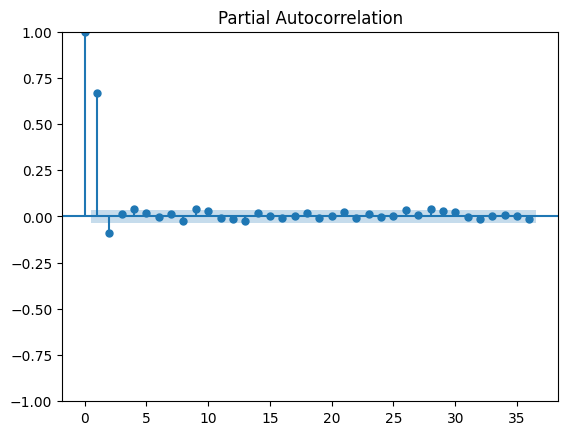

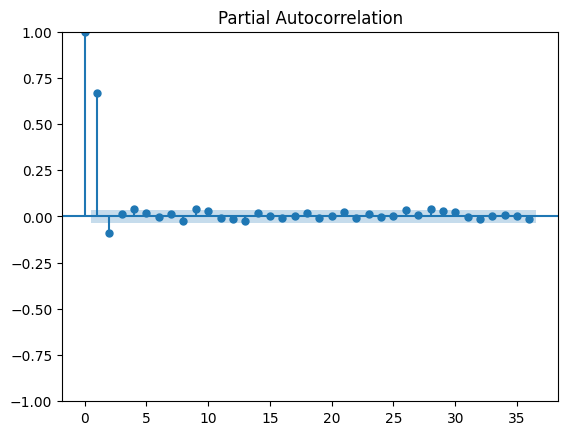

In [111]:
plot_pacf(seattle_temp_20.residual)

In [112]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(seattle_temp_20.residual, order=(2,1,7))
res=model.fit()
res.summary()

C:\Users\maxvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\maxvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\maxvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\maxvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               residual   No. Observations:                 3288
Model:                 ARIMA(2, 1, 7)   Log Likelihood               -9913.039
Date:                Mon, 06 May 2024   AIC                          19846.078
Time:                        11:55:42   BIC                          19907.055
Sample:                    01-01-2008   HQIC                         19867.909
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2128      0.199     -1.072      0.284      -0.602       0.176
ar.L2          0.6636      0.138      4.797      0.000       0.392       0.935
ma.L1         -0.0581      0.199     -0.293      0.770      -0.448       0.331
ma.L2         -1.0147      0.150     -6.778      0.000      -1.308      -0.721
ma.L3         -0.0830      0.071     -1.165      0.244      -0.223       0.057
ma.L4          0.0620      0.060      1.031      0.303      -0.056       0.180
ma.L5          0.0848      0.042      2.012      0.044       0.002       0.167
ma.L6          0.0187      0.031      0.597      0.550      -0.043       0.080
ma.L7         -0.0017      0.026     -0.065      0.948      -0.052       0.049
sigma2        24.3569      0.544     44.803      0.000      23.291      25.422
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                37.01
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.07
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(seattle_temp_20.residual, order=(1,1,6))
model = arima_model.fit()
#print(model.summary())
testset['residual_pred'] = model.forecast(len(testset))
testset

C:\Users\maxvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\maxvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\maxvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


NameError: name 'testset' is not defined

In [61]:
testset['residual_pred'].describe()

count    49.000000
mean     12.140949
std       0.016140
min      12.038323
25%      12.141449
50%      12.141449
75%      12.141449
max      12.175708
Name: residual_pred, dtype: float64

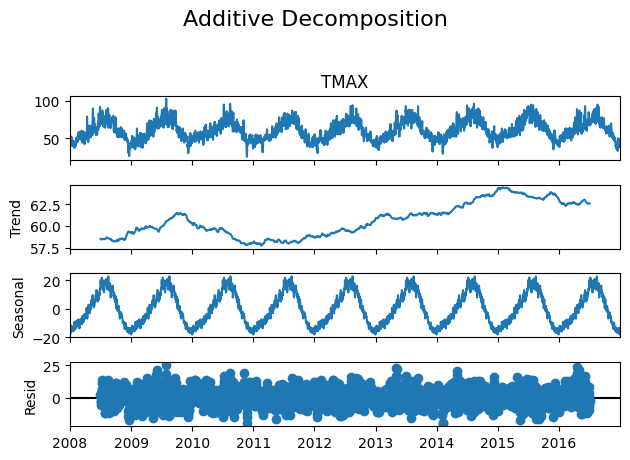

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(seattle_temp_20['TMAX'], model="additive",period=365)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()